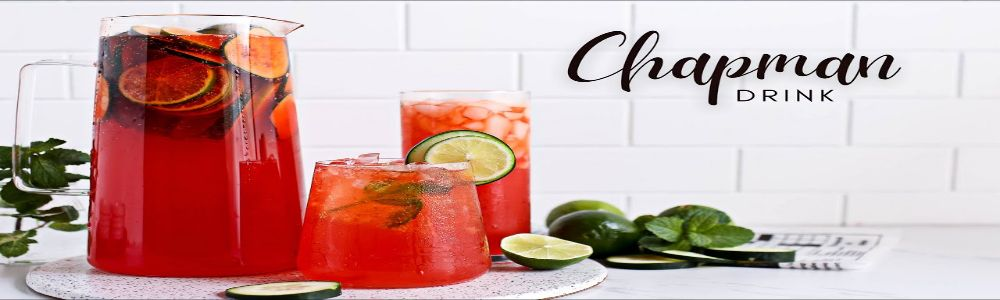

### Load & Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\data-for-time-series\\chapman_sales.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.rename({'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'}, axis=1, inplace=True)

In [4]:
df.shape

(107, 2)

In [5]:
df.size

214

In [6]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [7]:
df.dtypes

Month     object
Sales    float64
dtype: object

#### Handling Missing value

In [8]:
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Month    0
Sales    0
dtype: int64

#### Change to Data type to DateTime

In [10]:
df['Date']=pd.to_datetime(df['Month'])
df.drop('Month', axis=1, inplace=True)
df.head()

,Sales,Date
0,2815.0,1964-01-01
1,2672.0,1964-02-01
2,2755.0,1964-03-01
3,2721.0,1964-04-01
4,2946.0,1964-05-01


#### Set Date column to index of DataFrame

In [11]:
df.set_index('Date', inplace=True)
df.head()

,Sales
Date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


### Time Series Forecasting

#### Plot Time Series

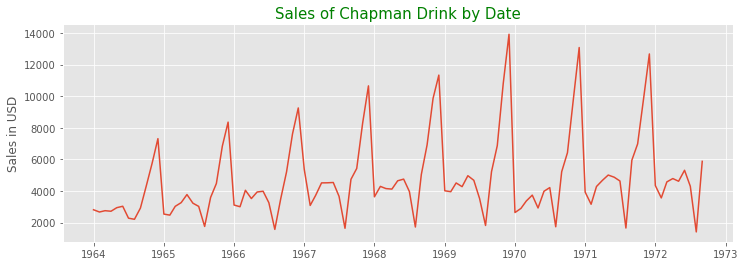

In [12]:
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
plt.plot(df, label='Sales')
plt.ylabel('Sales in USD', fontsize=12)
plt.title('Sales of Chapman Drink by Date', fontsize=15, color='green');

**From plot we can see the Tred and Seasonality.**

#### Split Data into training & testing set

In [13]:
len(df)

105

In [14]:
train=df[:99]
test=df[99:]
train_len=len(train)

### 1. Naive Method

#### Build, train the model & Forecast

In [15]:
naive=test.copy()
naive['forecast']=train['Sales'][train_len-1]
naive

,Sales,forecast
Date,,
1972-04-01,4788.0,4577.0
1972-05-01,4618.0,4577.0
1972-06-01,5312.0,4577.0
1972-07-01,4298.0,4577.0
1972-08-01,1413.0,4577.0
1972-09-01,5877.0,4577.0


#### Plot train, test & forecasted sales values.

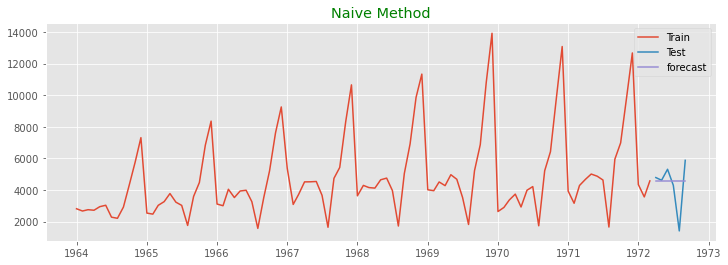

In [16]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(naive['forecast'], label='forecast')
plt.legend()
plt.title('Naive Method', color='green');

#### Evaluate the model using RMSE & MAPE

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse=np.sqrt(mean_squared_error(naive['forecast'], test)).round(2)
mape=mean_absolute_percentage_error(naive['forecast'], test).round(2)*100

results = pd.DataFrame({'Method':['Naive method'], 'RMSE': [rmse], 'MAPE': [mape]})
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0


- RMSE is too high. Try Different Method.

### 2. Simple Moving Method

#### Build & train the model & forecast

In [18]:
smm=test.copy()
smm['forecast']=train['Sales'].mean()
smm

,Sales,forecast
Date,,
1972-04-01,4788.0,4783.989899
1972-05-01,4618.0,4783.989899
1972-06-01,5312.0,4783.989899
1972-07-01,4298.0,4783.989899
1972-08-01,1413.0,4783.989899
1972-09-01,5877.0,4783.989899


#### Plot train, test & forecast

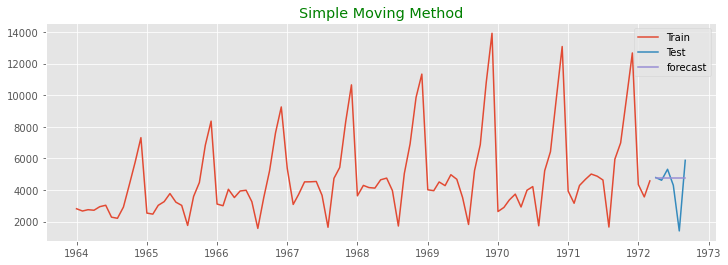

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(smm['forecast'], label='forecast')
plt.legend()
plt.title('Simple Moving Method', color='green');

#### Evaluate the model

In [20]:
rmse=np.sqrt(mean_squared_error(smm['forecast'], test)).round(2)
mape=mean_absolute_percentage_error(smm['forecast'], test).round(2)*100

smm_results = pd.DataFrame({'Method':['Simple Moving method'], 'RMSE': [rmse], 'MAPE': [mape]})
results=pd.concat([results,smm_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0


- This method is also not performing well.

### 3. Simple Moving Average Method

#### Build & train the model & forecast

* As we observed in Time Series plot the Seasonality happens in every 12 months hence we choose rolling(running) mean of 12 previous observations.

In [21]:
sma=df.copy()
sma['forecast']=df['Sales'].rolling(window=12).mean()
sma['forecast'][train_len:] = sma['forecast'][train_len-1]
sma

,Sales,forecast
Date,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,5732.833333
1972-06-01,5312.0,5732.833333
1972-07-01,4298.0,5732.833333


#### Plot train, test & forecasted value

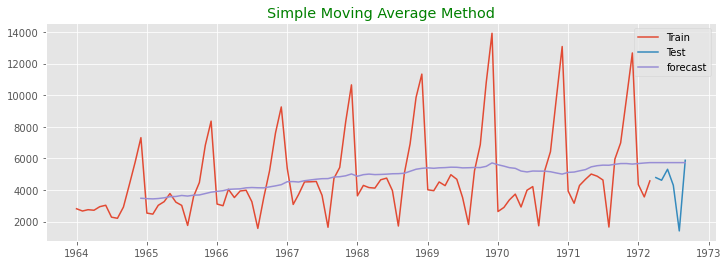

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sma['forecast'], label='forecast')
plt.legend()
plt.title('Simple Moving Average Method', color='green');

#### Evaluate the model

In [23]:
rmse = np.sqrt(mean_squared_error(test, sma['forecast'][train_len:])).round(2)
mape=mean_absolute_percentage_error(sma['forecast'][train_len:], test).round(2)*100

sma_results = pd.DataFrame({'Method':['Simple moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, sma_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0


- This method also not perfoming well.

### 4. Simple Exponential Smoothing

#### Biuld & train the model & Forecast

In [24]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model=SimpleExpSmoothing(train)
model_fit=model.fit(optimized=True)
forecast=model_fit.forecast(len(test))
forecast

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1972-04-01    5677.849307
1972-05-01    5677.849307
1972-06-01    5677.849307
1972-07-01    5677.849307
1972-08-01    5677.849307
1972-09-01    5677.849307
Freq: MS, dtype: float64

#### Plot train, test & forecasted values

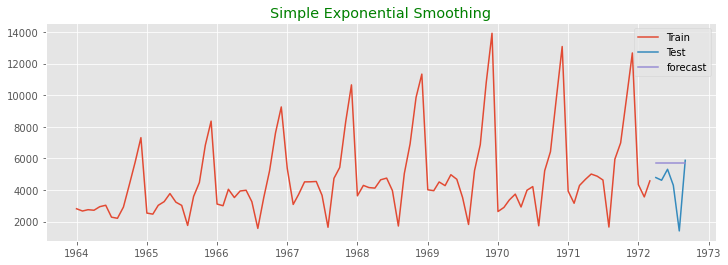

In [25]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('Simple Exponential Smoothing', color='green');

#### Evaluate the model

In [26]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

sim_exp_results = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, sim_exp_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0


- RMSE is high, hence this model is not suitable.

### 5. Exponential Smoothing with Trend

#### Biuld, train the model & forecast

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(train, seasonal_periods=12, trend='additive', seasonal=None)
model_fit=model.fit(optimized=True)
forecast=model_fit.forecast(len(test))
forecast

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1972-04-01    5860.287671
1972-05-01    5869.924623
1972-06-01    5879.561575
1972-07-01    5889.198526
1972-08-01    5898.835478
1972-09-01    5908.472430
Freq: MS, dtype: float64

#### Plot train, test & forecasted values

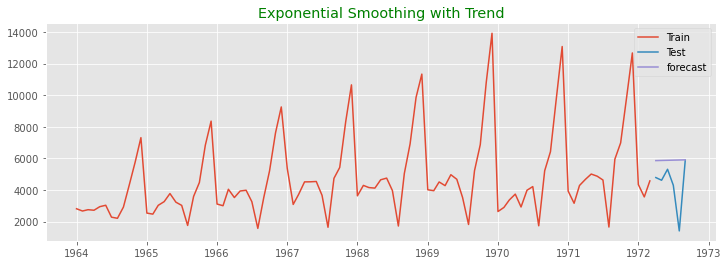

In [28]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('Exponential Smoothing with Trend', color='green');

#### Evaluate the model

In [29]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

exp_trend_results = pd.DataFrame({'Method':['Exponential Smoothing with Trend'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, exp_trend_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0


- RMSE is higher than previous all models, hence this method cannot be preffered to forecast the Sales.

### 6.  Expnential smoothing Additive method with Trend & Seasonality.

#### Build, train the model & forecast

In [30]:
warnings.filterwarnings('ignore')
model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='additive')
model_fit=model.fit(optimized=True)
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4821.991125
1972-05-01    4915.630396
1972-06-01    5036.916320
1972-07-01    4810.641984
1972-08-01    2089.068433
1972-09-01    6098.852221
Freq: MS, dtype: float64

#### Plot train, test & forecasted values

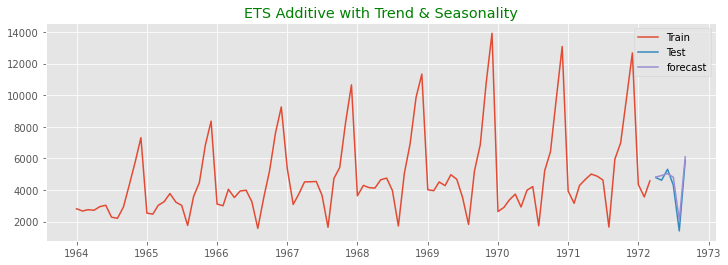

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('ETS Additive with Trend & Seasonality', color='green');

#### Evaluate the model

In [32]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

ETS_add_results = pd.DataFrame({'Method':['ETS Add Trend & Seasonality'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, ETS_add_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0


* RMSE is very low and hence this method would be choosen for forecasting

### 7. Expnential smoothing Multiplicative method with Trend & Seasonality.

In [33]:
model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='mul')
model_fit=model.fit(optimized=True)
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4763.577464
1972-05-01    4921.804163
1972-06-01    5088.435184
1972-07-01    4616.943512
1972-08-01    1992.323722
1972-09-01    5969.306251
Freq: MS, dtype: float64

#### Plot train, test & forecasted values

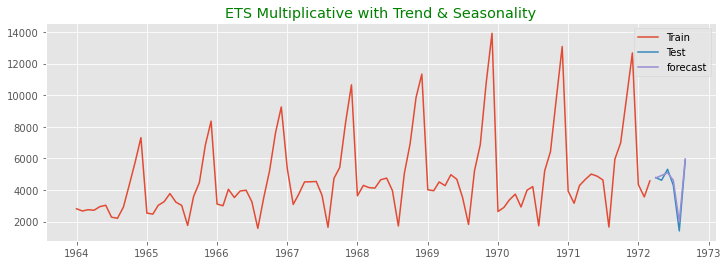

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('ETS Multiplicative with Trend & Seasonality', color='green');

#### Evaluate the model

In [35]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

ETS_mul_results = pd.DataFrame({'Method':['ETS Mult Trend & Seasonality'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, ETS_mul_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0


* RMSE is lower than ETS Additive method. Hence this method is preffered over all other previous methods.

### 8. ETS with alpha, beta & gamma

#### Build, train the model & forecast

In [36]:
alpha=0.8
beta=0.15
gamma=0.05
model=ExponentialSmoothing(train, trend='mul', seasonal_periods=12, seasonal='mul')
model_fit=model.fit(smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma)
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4630.481816
1972-05-01    4950.893047
1972-06-01    4892.964380
1972-07-01    4006.769173
1972-08-01    2249.336214
1972-09-01    5136.011044
Freq: MS, dtype: float64

#### Plot train test & foreecasted values.

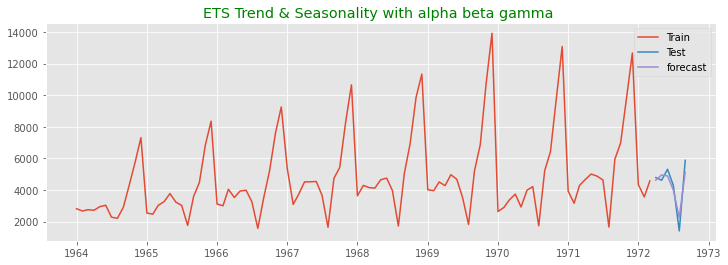

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('ETS Trend & Seasonality with alpha beta gamma ', color='green');

#### Evaluate the model

In [38]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

ETS_abg_results = pd.DataFrame({'Method':['ETS with alpha,beta,gamma'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, ETS_abg_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0


- Thos method preffer over all the methods except ETS additive & multiplicative methods.

### Auto Regressor Methods

#### Stationarity Check

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(df['Sales'])
adf_test

(-1.8335930563276253,
 0.36391577166024386,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [40]:
#H0: It is non stationary
#H1: It is stationary
def adf_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistics', 'p-value','#Lags Used', 'No. of Observations Used']
    for value,label in zip(result,labels):
        print(label+ ':' +str(value))
    if result[1]<=0.05:
        print(" Hence Series is Stationary")
    else:
        print("Hence Series is not Stationary")

In [41]:
adf_test(df['Sales'])

ADF Test Statistics:-1.8335930563276253
p-value:0.36391577166024386
#Lags Used:11
No. of Observations Used:93
Hence Series is not Stationary


- Our series is **Not Stationary.**

**To make our series Stationary use Differencing**

### Differencing

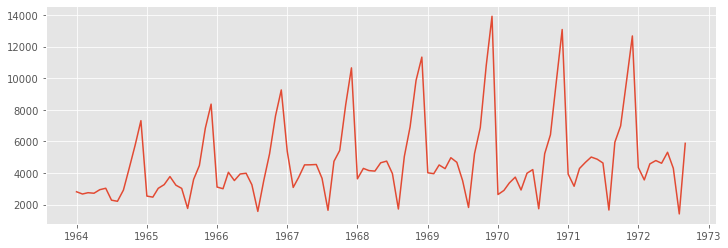

In [42]:
plt.figure(figsize=(12,4))
plt.plot(df['Sales'])

**Looking at time series plot we can see the seasonal peroid is 12 months so use 12 difference to get our series stationary.**

<AxesSubplot:xlabel='Date'>

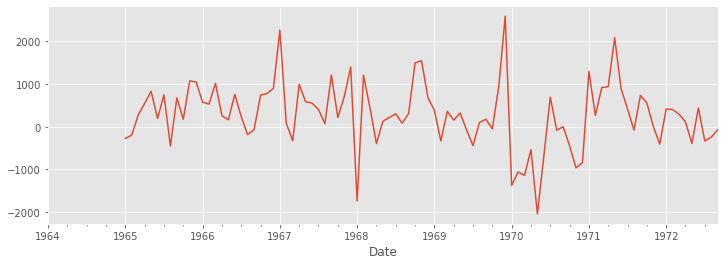

In [43]:
df1=df.copy()
df1['Sales_seasonal_diff']=df1['Sales'] - df1['Sales'].shift(12)
plt.figure(figsize=(12,4))
df1['Sales_seasonal_diff'].plot()

In [44]:
adf_test(df1['Sales_seasonal_diff'].dropna())

ADF Test Statistics:-7.626619157213164
p-value:2.060579696813685e-11
#Lags Used:0
No. of Observations Used:92
 Hence Series is Stationary


**After 12 difference our Series is become Stationary.**

#### To get p, q, d values plot Auto correlation & Partial Auto Correlation plot

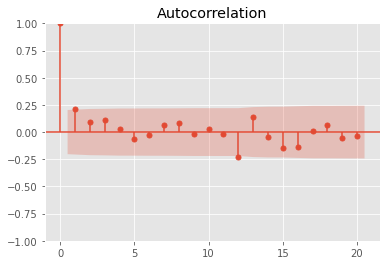

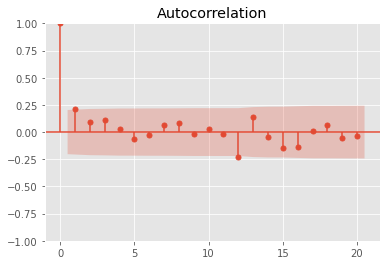

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1.Sales_seasonal_diff.dropna(), lags=20)

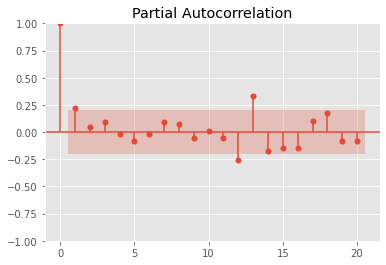

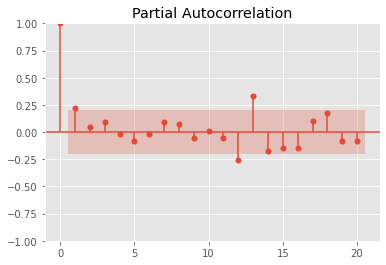

In [46]:
plot_pacf(df1.Sales_seasonal_diff.dropna(), lags=20)

* q=After how many Lags Series is either 0 or Negative in Autocorelation
* p=After how many Lags Series is either 0 or Negative in Partial-Autocorelation
* d=After how many difference the series become Stationary
* Period- After how many Months Pattern is repeating.
* To get P,D,Q create new series using our series which is grouped up with 12 years(in our case) ans sum up each year and do the same thing which we did while calculating p,q,d.

### 9. Auto Regressive (AR) Method
**In AR model select p value only and other parameters are 0**

In [47]:
warnings.filterwarnings('ignore')
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train, order=(1,0,0))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4686.035166
1972-05-01    4737.634352
1972-06-01    4762.052860
1972-07-01    4773.608537
1972-08-01    4779.077080
1972-09-01    4781.664982
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot train, test & forecasted values

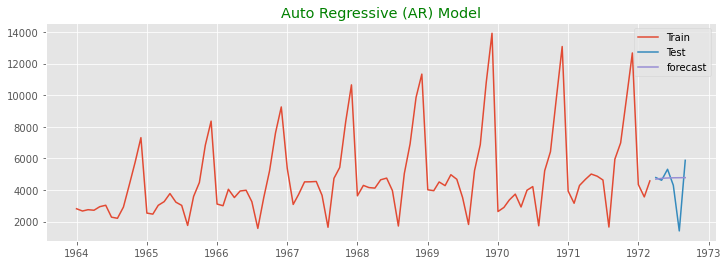

In [48]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('Auto Regressive (AR) Model', color='green');

#### Evaluate the model

In [49]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

ar_results = pd.DataFrame({'Method':['AR'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, ar_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0


- RMSE is high. Model cannot use to forecast.

### 10. Moving Average (MA) 
**Here only q value is computed in period all parameters are set to 0**

In [50]:
model=sm.tsa.arima.ARIMA(train, order=(0,0,1))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4205.865338
1972-05-01    4781.472691
1972-06-01    4781.472691
1972-07-01    4781.472691
1972-08-01    4781.472691
1972-09-01    4781.472691
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot train, test & forecasted values

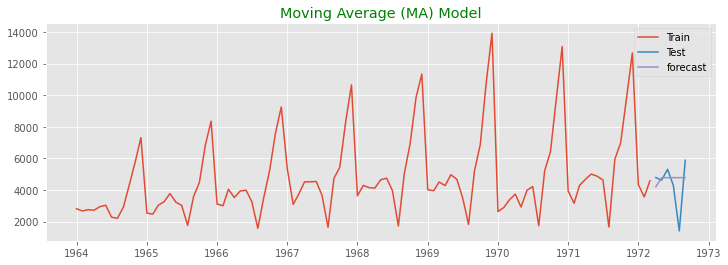

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('Moving Average (MA) Model', color='green');

#### Evaluate the model

In [52]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

ma_results = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, ma_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0
0,MA,1495.97,49.0


- RMSE is high in this model,  hence cannot preffered to forecast.

### 12. Auto Regressive Moving Average (ARMA)
**Here p & q value computed and d is set  to 0.**

In [53]:
model=sm.tsa.arima.ARIMA(train, order=(1,0,1))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    3977.024947
1972-05-01    4914.153755
1972-06-01    4762.994305
1972-07-01    4787.376417
1972-08-01    4783.443567
1972-09-01    4784.077938
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot train, test & forecasted values

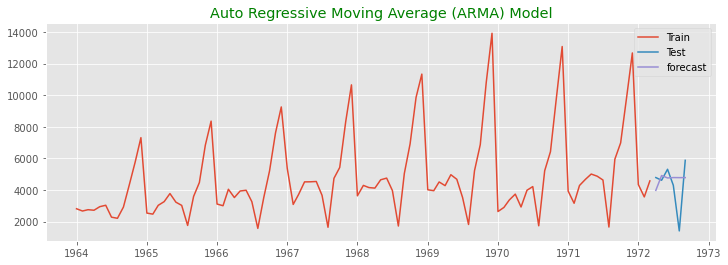

In [54]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title('Auto Regressive Moving Average (ARMA) Model', color='green');

#### Evaluate the model

In [55]:
rmse = np.sqrt(mean_squared_error(test, forecast)).round(2)
mape=mean_absolute_percentage_error(test, forecast).round(2)*100

arma_results = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, arma_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0
0,MA,1495.97,49.0


- This model is also not preffered because  it is giving high error.

### 13. Auto Regressive Integrated Moving Average (ARIMA)
**Here we are providing all parameters i.e p, q & d.**

In [56]:
model=sm.tsa.arima.ARIMA(train, order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4992.265667
1972-05-01    5183.743491
1972-06-01    5272.033373
1972-07-01    5312.743588
1972-08-01    5331.514953
1972-09-01    5340.170376
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
np.sqrt(mean_squared_error(forecast, test)).round(2)

1685.03

- RMSE is high, we can tune the parameters to get optimul results using itertools.

In [58]:
warnings.filterwarnings('ignore')

import itertools
p=range(0,10)
q=range(0,10)
d=range(0,8)
pdq=list(itertools.product(p,d,q))
len(pdq)

800

In [ ]:
rmse=[]
order1=[]
count=0
for pdq in pdq:
    try:
        model=sm.tsa.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(df)-1)
        error=np.sqrt(mean_squared_error(pred,test))
        order1.append(pdq)
        rmse.append(error)
        print(count)
        count+=1
    except:
        continue

In [61]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.round(2)

,RMSE
"(0, 0, 0)",1477.66
"(0, 0, 1)",1495.97
"(0, 0, 2)",1512.78
"(0, 0, 3)",1549.04
"(0, 0, 4)",1660.57
...,...
"(9, 7, 3)",27073.79
"(9, 7, 4)",20886.12
"(9, 7, 5)",2468.62
"(9, 7, 6)",25684.43


In [62]:
pd.pivot_table(order, index=order.index, values='RMSE', aggfunc=min).sort_values(by='RMSE', ascending=True)[:5]

,RMSE
"(9, 0, 6)",384.150940
"(9, 0, 7)",402.605861
"(8, 1, 7)",425.250093
"(9, 0, 9)",480.060990
"(9, 1, 7)",481.069365


**Using p=9, q=6, d=0, build the ARIMA model**

In [67]:
model=sm.tsa.arima.ARIMA(train, order=(10,0,6))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4393.555238
1972-05-01    5379.398805
1972-06-01    4750.356101
1972-07-01    4337.215257
1972-08-01    1570.347206
1972-09-01    5414.199983
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot train, test, forecasted valuess

Text(0.5, 1.0, 'Auto Regression Integraed Moving Average (ARIMA) Method')

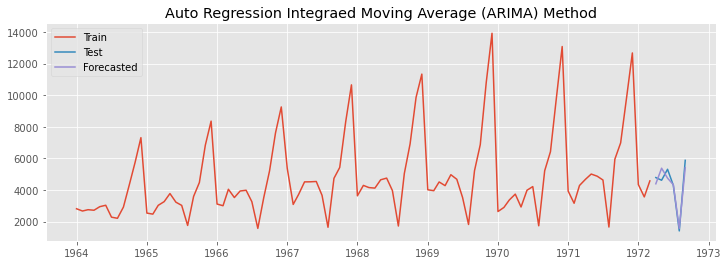

In [68]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Forecasted")
plt.legend()
plt.title("Auto Regression Integraed Moving Average (ARIMA) Method")

#### Evaluate the model

In [69]:
rmse=np.sqrt(mean_squared_error(test,forecast)).round(2)
mape=mean_absolute_percentage_error(test,forecast).round(2)*100

arima_results = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, arima_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0
0,MA,1495.97,49.0


- RMSE low hence this model preffered to forecast.

### 14. Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit=model.fit()
forecast=model_fit.forecast(len(test))
forecast

1972-04-01    4794.906767
1972-05-01    4755.972520
1972-06-01    4928.172506
1972-07-01    4859.684351
1972-08-01    1935.842709
1972-09-01    6064.543633
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot train, test & forecasted values

Text(0.5, 1.0, 'Seasonal Auto Regression Integraed Moving Average (SARIMA) Method')

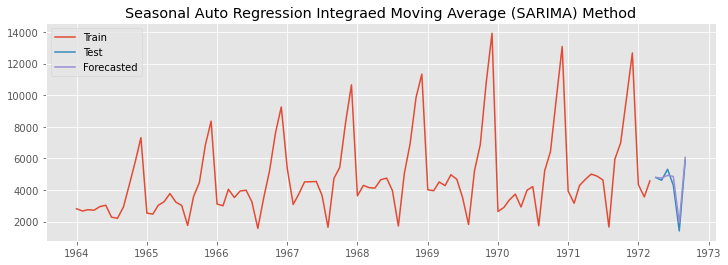

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Forecasted")
plt.legend()
plt.title("Seasonal Auto Regression Integraed Moving Average (SARIMA) Method")

#### Evaluate the model

In [72]:
rmse=np.sqrt(mean_squared_error(test,forecast)).round(2)
mape=mean_absolute_percentage_error(test,forecast).round(2)*100

sarima_results = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, sarima_results])
results

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0
0,MA,1495.97,49.0


- SARIMA also be preffered to forecast.

In [74]:
result=results.copy()
results.set_index('Method', inplace=True)
result

,Method,RMSE,MAPE
0,Naive method,1435.57,21.0
0,Simple Moving method,1477.66,20.0
0,Simple moving average method,1960.15,24.0
0,Simple Exponential Smoothing,1922.74,64.0
0,Exponential Smoothing with Trend,2069.41,69.0
0,ETS Add Trend & Seasonality,394.65,13.0
0,ETS Mult Trend & Seasonality,313.25,10.0
0,"ETS with alpha,beta,gamma",523.54,16.0
0,AR,1476.68,47.0
0,MA,1495.97,49.0


### Conclusion : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:

**1. ETS Multiplicative with Trend & Seasonality.**

**2. ETS Aditive with Trend & Seasonality.**

**3. ETS with alpha,beta,gamma or Holt Winters method**

**4. ARIMA**

**5. SARIMA**

**are the best models for forecasting the sales for the data.**

**Above all five methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data.**